In [15]:
import numpy as np
from qiskit import *
from IPython.display import display, Math, Latex
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import pi, sqrt
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

<IPython.core.display.Latex object>

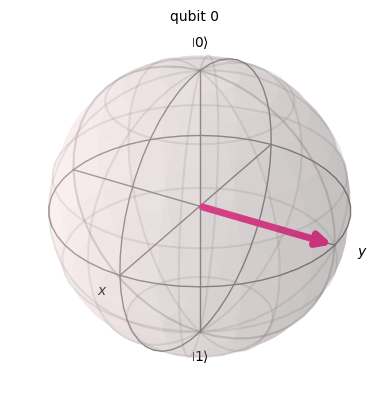

In [16]:
state_H = [1, 0]
state_V = [0, 1]
state_P = [1/sqrt(2), 1/sqrt(2)]
state_M = [1/sqrt(2), -1/sqrt(2)]
state_L = [1/sqrt(2), 1j/sqrt(2)]
state_R = [1/sqrt(2), -1j/sqrt(2)] 

state = state_L

# normalize and display the vector
euclidean_norm = sqrt(np.abs(state[0])**2 + np.abs(state[1])**2)
normalized_state = [state[0]/euclidean_norm , state[1]/euclidean_norm]
display(Statevector(normalized_state).draw(output='latex'))
display(plot_bloch_multivector(normalized_state))

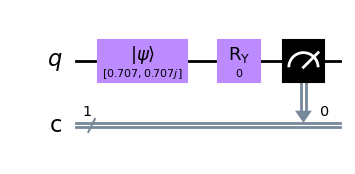

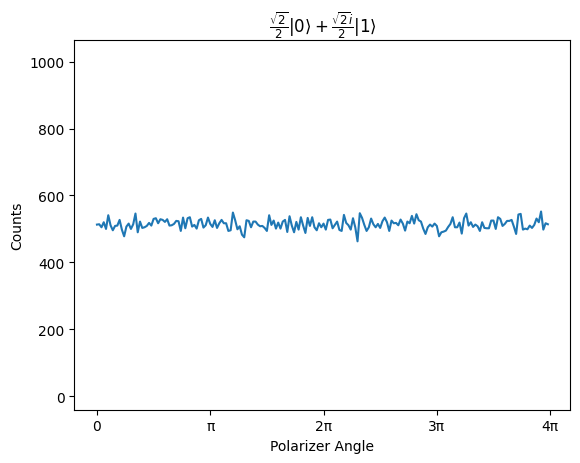

In [17]:
# N = how many rotation steps
N = 200

# numShots = how many times to run each circuit
numShots = 1024

x_val = []
y_val = []
qc = QuantumCircuit(1, 1)

for i in range(N):
    # build the circuit and initialize the starting state
    qc.clear()
    qc = QuantumCircuit(1, 1)
    qc.initialize(normalized_state, 0)
    
    # rotate
    delta = 4*i*pi/N
    qc.ry(delta, 0)
    qc.measure(0, 0)

    # display the circuit for the first time
    if i == 0:
        display(qc.draw(output='mpl'))
    
    # simulate
    backend = AerSimulator(method='statevector')
    job = backend.run(transpile(qc, backend), shots=numShots)
    result = job.result()
    counts = result.get_counts(qc)
    
    # put in a zero for the count if needed
    if '0' in counts:
        out0 = counts['0']
    else:
        out0 = 0     
    
    x_val.append(delta)
    y_val.append(out0)
   
# graph
fig, ax = plt.subplots()
ax.set_xlabel('Polarizer Angle')
ax.set_ylabel('Counts')
ax.set_ylim(0 - 40, numShots + 40)
ax.set_title('$' + Statevector(normalized_state).draw(output='latex_source') + '$')
ax.set_xticks([0, pi, 2*pi, 3*pi, 4*pi], ['0', 'π', '2π', '3π', '4π'])
line = ax.plot(x_val,y_val)
plt.savefig('C:\\Users\\ays2\\Downloads\\L_plot', dpi=1000)